In [5]:
from google.colab import drive 
drive.mount('/content/gdrive')

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os 
import sys
sns.set_style('darkgrid')
sns.set_palette('bone')

pd.options.display.float_format = '{:.3f}'.format

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
def toTapleList(list1, list2):
    return list(itertools.product(list1, list2))

In [0]:
def reduce_mem_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns : 
        col_type = df[col].dtype
        
        if col_type  != object :
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                    
            else : 
                if c_min>np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else : 
                    df[col] = df[col].astype(np.float64)
                    
    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f}MB --> {:.2f} MB (Decreased by {:.1f}%)".format(start_mem, end_mem, 100*(start_mem - end_mem) / start_mem))
    return df

In [8]:
%%time 
train = pd.read_csv('/content/gdrive/My Drive/pubg/train_V2.csv')
train = reduce_mem_usage(train)
test = pd.read_csv('/content/gdrive/My Drive/pubg/test_V2.csv')
test = reduce_mem_usage(test)
print(train.shape, test.shape)

Memory usage of dataframe is 983.90MB --> 339.28 MB (Decreased by 65.5%)
Memory usage of dataframe is 413.18MB --> 140.19 MB (Decreased by 66.1%)
(4446966, 29) (1934174, 28)
CPU times: user 19 s, sys: 1.29 s, total: 20.3 s
Wall time: 23.1 s


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int8
boosts             int8
damageDealt        float32
DBNOs              int8
headshotKills      int8
heals              int8
killPlace          int8
killPoints         int16
kills              int8
killStreaks        int8
longestKill        float32
matchDuration      int16
matchType          object
maxPlace           int8
numGroups          int8
rankPoints         int16
revives            int8
rideDistance       float32
roadKills          int8
swimDistance       float32
teamKills          int8
vehicleDestroys    int8
walkDistance       float32
weaponsAcquired    int16
winPoints          int16
winPlacePerc       float32
dtypes: float32(6), int16(5), int8(14), object(4)
memory usage: 339.3+ MB


In [10]:
null_cnt = train.isnull().sum().sort_values()
print('null count : ', null_cnt[null_cnt >0])

null count :  winPlacePerc    1
dtype: int64


In [11]:
train.describe(include = np.number).drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.234,0.589,0.000,0.000,0.000,0.000,22.000
boosts,1.107,1.716,0.000,0.000,0.000,2.000,33.000
damageDealt,130.633,169.887,0.000,0.000,84.240,186.000,6616.000
DBNOs,0.658,1.146,0.000,0.000,0.000,1.000,53.000
headshotKills,0.227,0.602,0.000,0.000,0.000,0.000,64.000
heals,1.370,2.680,0.000,0.000,0.000,2.000,80.000
killPlace,47.599,27.463,1.000,24.000,47.000,71.000,101.000
killPoints,505.006,627.505,0.000,0.000,0.000,1172.000,2170.000
kills,0.925,1.558,0.000,0.000,0.000,1.000,72.000
killStreaks,0.544,0.711,0.000,0.000,0.000,1.000,20.000


In [12]:
for c in ['Id', 'groupId', 'matchId'] :
    print(f'unique[{c}] count : ', train[c].nunique())

unique[Id] count :  4446966
unique[groupId] count :  2026745
unique[matchId] count :  47965


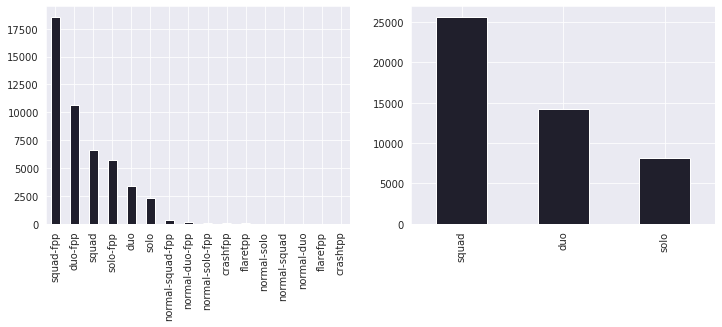

In [13]:
fig, ax = plt.subplots(1,2,figsize = (12,4))

train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax = ax[0])

mapper = lambda x : 'solo' if ('solo' in x ) else 'duo' if ('duo' in x ) or ('crash' in x ) else 'squad'
train['matchType'] = train['matchType'].apply(mapper)
train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

In [14]:
for q in ['numGroups == maxPlace', 'numGroups != maxPlace']:
    print(q, ':', len(train.query(q)))

numGroups == maxPlace : 1241090
numGroups != maxPlace : 3205876


In [15]:
cols = ['numGroups', 'maxPlace']
desc1 = train.groupby('matchType')[cols].describe()[toTapleList(cols, ['min','mean','max'])]
group = train.groupby(['matchType', 'matchId','groupId']).count().groupby(['matchType','matchId']).size().to_frame('groups in match')
desc2 = group.groupby('matchType').describe()[toTapleList(['groups in match'],['min','mean','max'])]

pd.concat([desc1, desc2], axis = 1)

numGroups                 ... groups in match               
                min   mean     max  ...             min   mean     max
matchType                           ...                               
duo           1.000 45.812  52.000  ...           1.000 45.349  52.000
solo          1.000 91.115 100.000  ...           1.000 85.669 100.000
squad         2.000 27.039  37.000  ...           2.000 26.835  37.000

[3 rows x 9 columns]

In [16]:
match = train.groupby(['matchType', 'matchId']).size().to_frame('players in match')
group = train.groupby(['matchType', 'matchId', 'groupId']).size().to_frame('players in group')
pd.concat([match.groupby('matchType').describe()[toTapleList(['players in match'], ['min','mean','max'])], group.groupby('matchType').describe()[toTapleList(['players in group'], ['min','mean','max'])]], axis = 1)

players in match                players in group             
                       min   mean     max              min  mean    max
matchType                                                              
duo                  7.000 92.986 100.000            1.000 2.050 72.000
solo                 1.000 89.032 100.000            1.000 1.039 64.000
squad                5.000 93.723 100.000            1.000 3.493 74.000

In [17]:
print(group['players in group'].nlargest(5))
del match, group

matchType  matchId         groupId       
squad      b30f3d87189aa6  14d6b54cdec6bc    74
duo        3e029737889ce9  b8275198faa03b    72
solo       41a634f62f86b7  128b07271aa012    64
duo        7e93ce71ac6f61  7385e5fe214021    49
squad      3c2531adf5b942  e52a2e6ca30474    36
Name: players in group, dtype: int64


In [18]:
subset = train[train['matchId'] == '41a634f62f86b7']
sub_grp = subset[subset['groupId'] == '128b07271aa012']

print('matchId == \'41a634f62f86b7\' & groupId == \'128b07271aa012\'')
print('-'*50)
print('players:',len(subset))
print('groups :', subset['groupId'].nunique())
print('numGroups:', subset['numGroups'].unique())
print('maxPlace :', subset['maxPlace'].unique())
print('-'*50)
print('max-group players :', len(sub_grp))
print('max-group winPlacePerc :', sub_grp['winPlacePerc'].unique())
print('-'*50)
print('winPlacePerc :', subset['winPlacePerc'].sort_values().unique())

matchId == '41a634f62f86b7' & groupId == '128b07271aa012'
--------------------------------------------------
players: 97
groups : 34
numGroups: [34]
maxPlace : [97]
--------------------------------------------------
max-group players : 64
max-group winPlacePerc : [0.28119999]
--------------------------------------------------
winPlacePerc : [0.         0.0104     0.0208     0.0312     0.0417     0.0521
 0.0625     0.0729     0.0833     0.0938     0.1042     0.1146
 0.125      0.1354     0.14579999 0.15620001 0.16670001 0.1771
 0.1875     0.1979     0.20829999 0.21879999 0.22920001 0.2396
 0.25       0.2604     0.27079999 0.28119999 0.7604     0.77079999
 0.89579999 0.91670001 0.9896     1.        ]


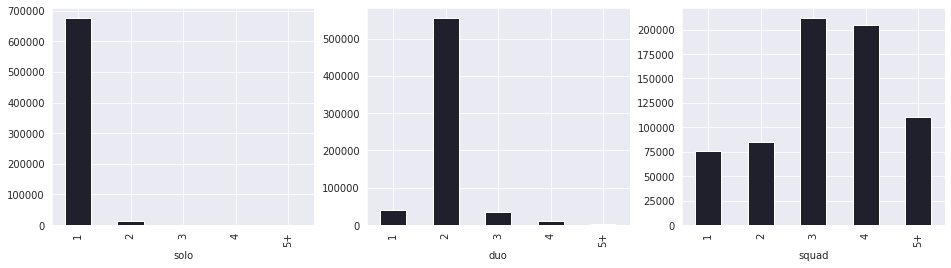

In [19]:
group = train.groupby(['matchId', 'groupId','matchType'])['Id'].count().to_frame('players').reset_index()
group.loc[group['players']>4, 'players'] = '5+'
group['players'] = group['players'].astype(str)

fig, ax = plt.subplots(1, 3, figsize = (16,4))
for mt, ax in zip(['solo', 'duo', 'squad'], ax.ravel()):
    ax.set_xlabel(mt)
    group[group['matchType'] == mt]['players'].value_counts().sort_index().plot.bar(ax=ax)

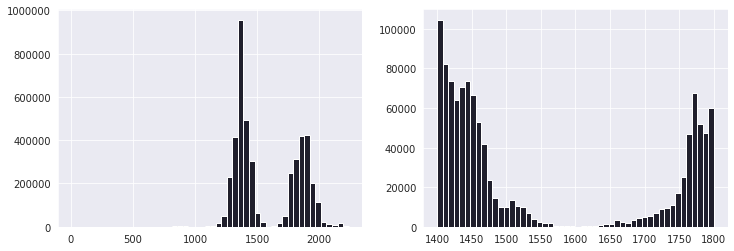

In [20]:
fig, ax = plt.subplots(1,2,figsize = (12,4))

train['matchDuration'].hist(bins=50, ax=ax[0])
train.query('matchDuration >=1400 & matchDuration <=1800')['matchDuration'].hist(bins = 50, ax=ax[1])

In [21]:
train[train['matchDuration'] == train['matchDuration'].min()].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.000,0,0,0,1,0,0,0,0.000,9,solo,1,1,1574,0,0.000,0,0.000,0,0,0.000,0,0,nan


In [22]:
train[train['matchDuration'] == train['matchDuration'].max()].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
130663,8089c9ef1fa09e,3c909156e89431,f8e02cb4c82d7d,0,0,0.000,0,0,0,72,0,0,0,0.000,2237,solo,97,92,1510,0,0.000,0,0.000,0,0,231.800,3,0,0.260
139317,3049d51e07bab3,4086a790e99513,f8e02cb4c82d7d,0,0,100.000,0,0,0,34,0,1,1,7.217,2237,solo,97,92,1503,0,0.000,0,0.000,0,0,696.000,7,0,0.458
146220,cb3902c30f688c,65400d5cf84ead,f8e02cb4c82d7d,0,0,0.000,0,0,0,85,0,0,0,0.000,2237,solo,97,92,1505,0,0.000,0,0.000,0,0,99.950,1,0,0.125
246201,80e022ce3a64ff,b668e37229bb2d,f8e02cb4c82d7d,0,1,96.250,0,1,0,35,0,1,1,20.670,2237,solo,97,92,1609,0,0.000,0,0.000,0,0,1395.000,6,0,0.375
268239,0e50a3a859d3ab,9dcca2c1beb072,f8e02cb4c82d7d,0,0,0.000,0,0,0,41,0,0,0,0.000,2237,solo,97,92,1497,0,0.000,0,0.000,0,0,121.700,3,0,0.906


In [23]:
(train.groupby('matchId')['matchDuration'].nunique() > 1).any()

False

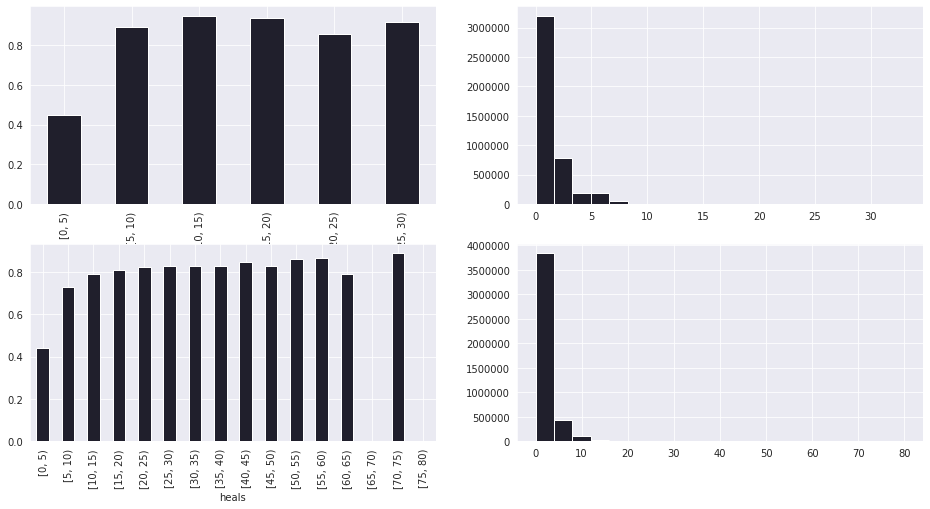

In [24]:
fig, ax = plt.subplots(2,2,figsize = (16,8))
cols = ['boosts', 'heals']
for col, ax in zip(cols, ax):
    sub = train[['winPlacePerc',col]].copy()
    mv = (sub[col].max()//5)+1
    sub[col] = pd.cut(sub[col], [5*x for x in range(0, mv)], right = False)
    sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax = ax[0])
    train[col].hist(bins = 20, ax= ax[1])

In [25]:
print('solo player has revives :', 'solo' in train.query('revives >0')['matchType'].unique())

solo player has revives : False


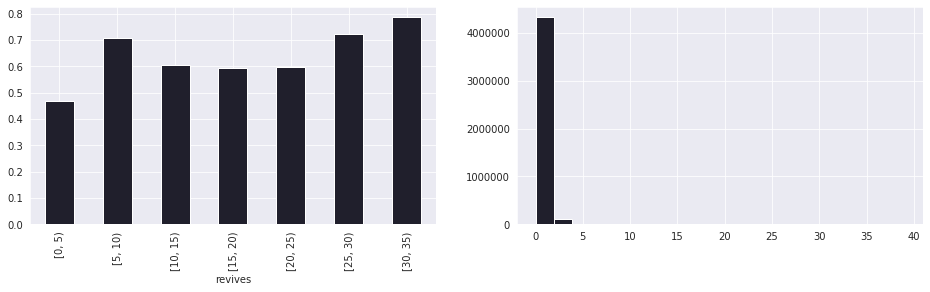

In [26]:
fig, ax = plt.subplots(1,2,figsize = (16,4))
col = 'revives'
sub = train.loc[~train['matchType'].str.contains('solo'),['winPlacePerc', col]].copy()
sub[col] = pd.cut(sub[col], [5*x for x in range(0,8)], right = False)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax = ax[0])
train[col].hist(bins=20, ax = ax[1])

In [27]:
train.groupby(['matchType'])['killPlace'].describe()[['min','mean','max']]

,min,mean,max
matchType,,,
duo,1.000,47.471,100.000
solo,1.000,47.457,100.000
squad,1.000,47.712,101.000


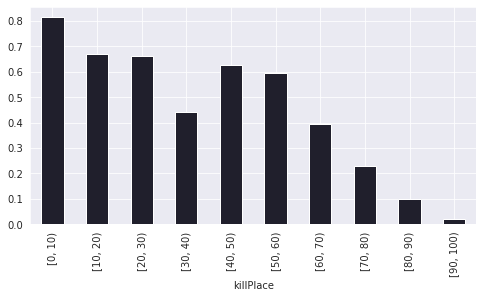

In [28]:
plt.figure(figsize = (8,4))
col = 'killPlace'
sub = train[['winPlacePerc', col]].copy()
sub[col] = pd.cut(sub[col], [10*x for x in range(0,11)], right=False)
sub.groupby(col).mean()['winPlacePerc'].plot.bar()

In [29]:
subMatch = train[train['matchId'] == train['matchId'].min()].sort_values(['winPlacePerc', 'killPlace'])
cols = ['groupId', 'kills', 'winPlacePerc', 'killPlace']
subMatch[cols]

,groupId,kills,winPlacePerc,killPlace
3895898,3a6addfa0df938,0,0.000,94
3599150,3a6addfa0df938,0,0.000,95
4367296,236ab9e9c081b9,0,0.037,88
4131025,236ab9e9c081b9,0,0.037,89
3088817,236ab9e9c081b9,0,0.037,90
...,...,...,...,...
1303528,ca058240046b4c,6,0.963,3
3637258,ca058240046b4c,5,0.963,6
2351120,ca058240046b4c,1,0.963,24
2848198,4d1bbbc19b9084,5,1.000,5


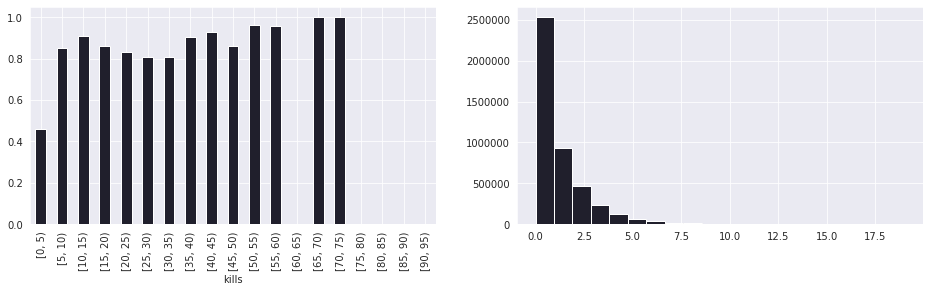

In [31]:
fig, ax = plt.subplots(1,2,figsize = (16,4))

col = 'kills'
sub = train[['winPlacePerc', col]].copy()
sub[col] = pd.cut(sub[col], [5*x for x in range(0,20)], right = False)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
train[train['kills']<20][col].hist(bins=20, ax=ax[1])

In [34]:
sub = train['matchType'].str.contains('solo')
pd.concat([train.loc[sub].groupby('matchId')['kills'].sum().describe(), train.loc[~sub].groupby('matchId')['kills'].sum().describe()], keys=['solo','team'], axis = 1).T

,count,mean,std,min,25%,50%,75%,max
solo,8095.000,83.410,27.606,0.000,84.000,89.000,92.000,786.000
team,39870.000,86.212,17.269,0.000,83.000,87.000,90.000,687.000


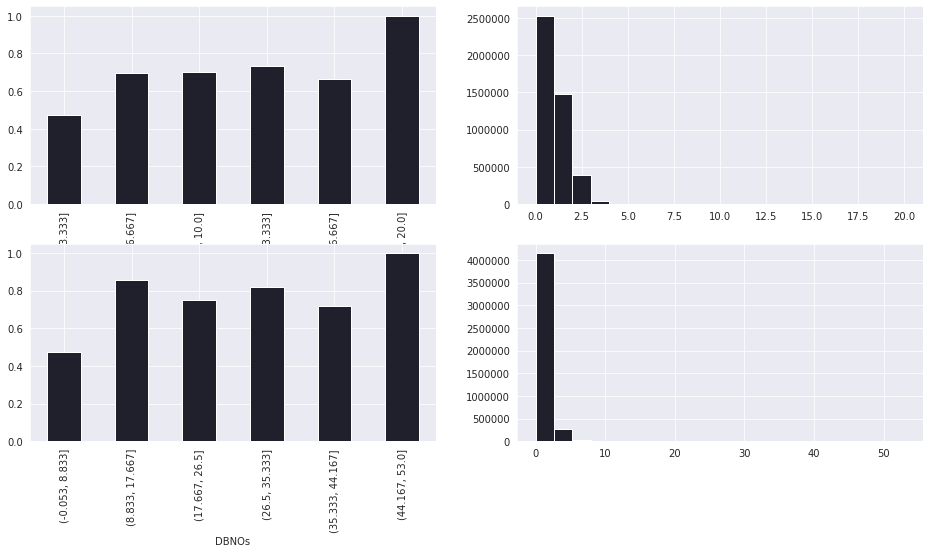

In [35]:
fig, ax = plt.subplots(2,2, figsize = (16,8))

cols = ['killStreaks', 'DBNOs']
for col, ax in zip(cols, ax):
  sub = train[['winPlacePerc', col]].copy()
  sub[col] = pd.cut(sub[col], 6)
  sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax = ax[0])
  train[col].hist(bins=20, ax=ax[1])

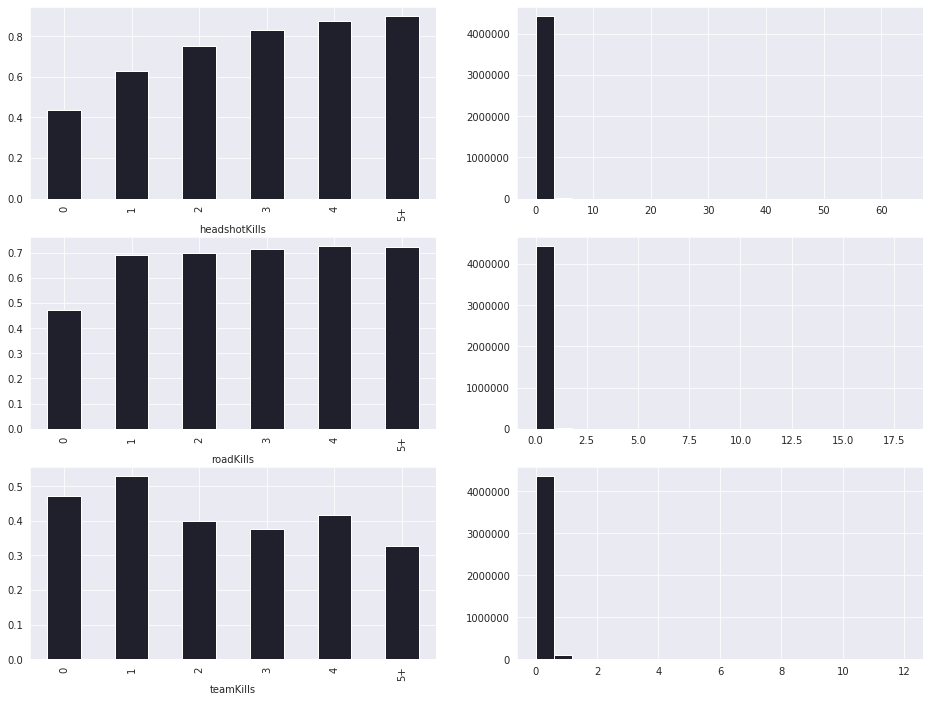

In [36]:
fig, ax = plt.subplots(3,2,figsize = (16,12))
cols = ['headshotKills', 'roadKills','teamKills']
for col, ax in zip(cols, ax):
  sub = train[['winPlacePerc', col]].copy()
  sub.loc[sub[col]>=5, col] = '5+'
  sub[col] = sub[col].astype(str)
  sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
  train[col].hist(bins=20, ax= ax[1])

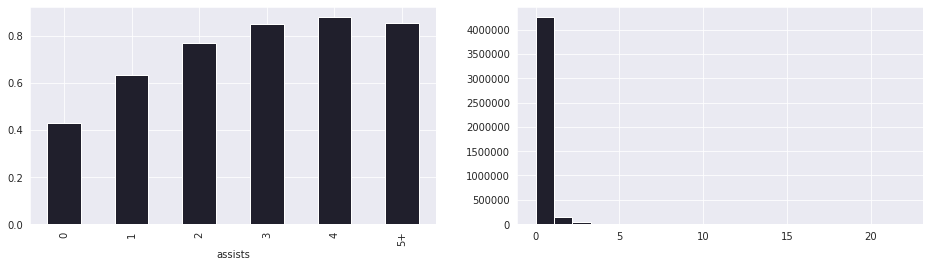

In [52]:
fig, ax = plt.subplots(1,2,figsize = (16,4))

col = 'assists'
sub =train[['winPlacePerc', col]].copy()
sub.loc[sub[col]>=5, col] = '5+'
sub[col] = sub[col].astype(str)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
train[col].hist(bins=20, ax=ax[1])

In [53]:
pd.concat([train[train['matchType'] == 'solo'].describe()['assists'], train[train['matchType'] != 'solo'].describe()['assists']], keys = ['solo', 'team'], axis = 1).T

,count,mean,std,min,25%,50%,75%,max
solo,720713.000,0.062,0.298,0.000,0.000,0.000,0.000,22.000
team,3726253.000,0.267,0.624,0.000,0.000,0.000,0.000,17.000


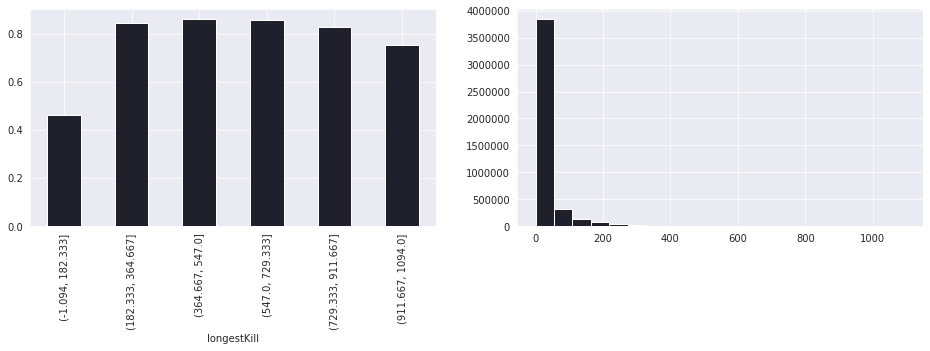

In [54]:
fig, ax = plt.subplots(1,2,figsize = (16,4))

col = 'longestKill'
sub = train[['winPlacePerc', col]].copy()
sub[col] = pd.cut(sub[col],6)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
train[col].hist(bins=20,ax=ax[1])

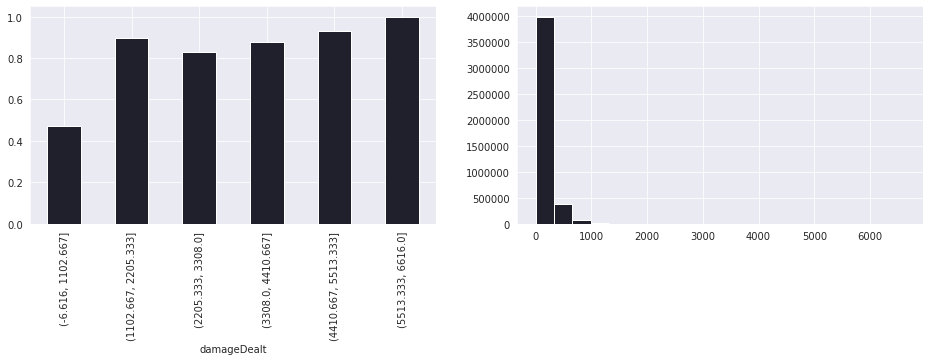

In [58]:
fig,ax = plt.subplots(1,2,figsize = (16,4))

col = 'damageDealt'
sub = train[['winPlacePerc', col]].copy()
sub[col] = pd.cut(sub[col], 6)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
train[col].hist(bins=20, ax=ax[1])

In [65]:
train.query('damageDealt == 0 & (kills > 0 | DBNOs > 0)')[['damageDealt', 'kills','DBNOs','headshotKills','roadKills','teamKills']].head(20)

,damageDealt,kills,DBNOs,headshotKills,roadKills,teamKills
150,0.000,0,1,0,0,1
589,0.000,0,1,0,0,0
707,0.000,0,1,0,0,0
892,0.000,1,0,0,0,0
942,0.000,1,0,0,0,0
949,0.000,0,1,0,0,2
1011,0.000,0,1,0,0,0
1468,0.000,0,2,0,0,1
1625,0.000,0,1,0,0,1
2111,0.000,0,1,0,0,1


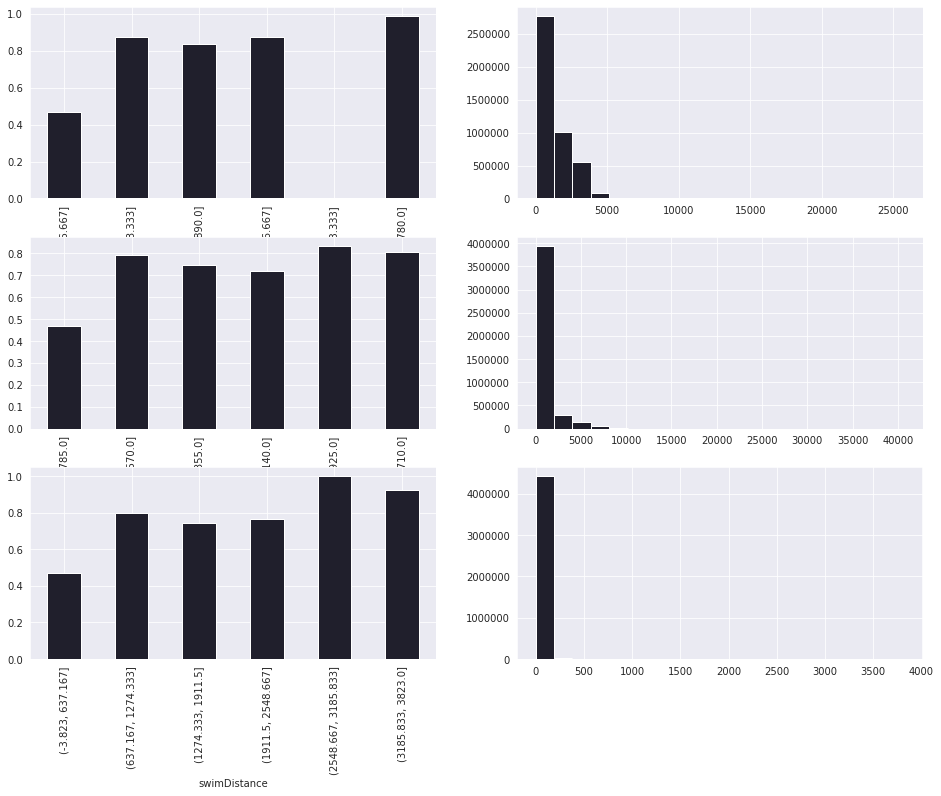

In [66]:
fig, ax = plt.subplots(3,2,figsize = (16,12))

cols = ['walkDistance', 'rideDistance','swimDistance']
for col, ax in zip(cols, ax):
  sub =train[['winPlacePerc', col]].copy()
  sub[col] = pd.cut(sub[col],6)
  sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax = ax[0])
  train[col].hist(bins=20, ax = ax[1])

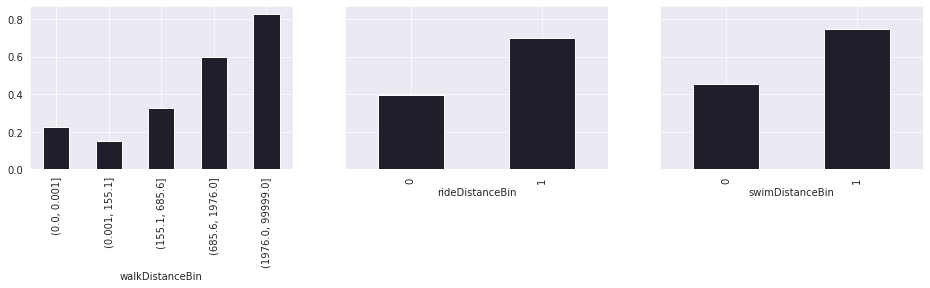

In [79]:
sub = train[['walkDistance','rideDistance','swimDistance','winPlacePerc']].copy()
walk = train['walkDistance']
sub['walkDistanceBin'] = pd.cut(walk, [0, 0.001, walk.quantile(.25), walk.quantile(.5), walk.quantile(.75), 99999])
sub['rideDistanceBin'] = (train['rideDistance']>0).astype(int)
sub['swimDistanceBin'] = (train['swimDistance']>0).astype(int)

fig, ax = plt.subplots(1, 3, figsize =(16,3), sharey = True)
sub.groupby('walkDistanceBin').mean()['winPlacePerc'].plot.bar(ax=ax[0])
sub.groupby('rideDistanceBin').mean()['winPlacePerc'].plot.bar(ax=ax[1])
sub.groupby('swimDistanceBin').mean()['winPlacePerc'].plot.bar(ax=ax[2])
del sub, walk

In [80]:
sub = train.query ('walkDistance == 0 & kills == 0 & weaponsAcquired == 0 & \'solo\' in matchType')
print('count : ',len(sub), 'winPlacePerc :', round(sub['winPlacePerc'].mean(),3))

count :  18155 winPlacePerc : 0.053


In [83]:
sq = 'kills > 3&(headshotKills / kills) >= 0.8'
sub = train.query(sq)
print(sq, '\n count : ', len(sub), 'winPlacePerc : ', round(sub['winPlacePerc'].mean(),3))

kills > 3&(headshotKills / kills) >= 0.8 
 count :  3859 winPlacePerc :  0.824


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


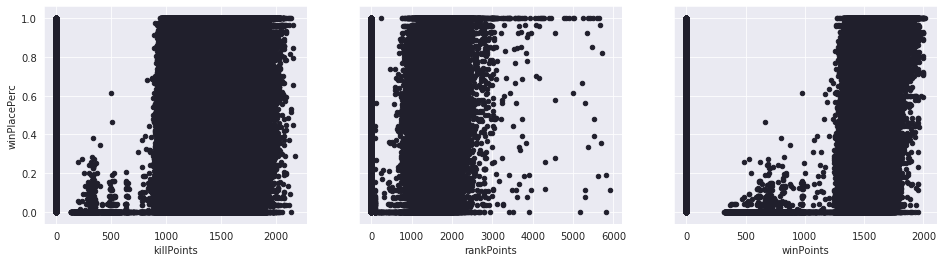

In [85]:
fig, ax = plt.subplots(1,3,figsize = (16,4), sharey = True)

cols = ['killPoints', 'rankPoints','winPoints']
for col, ax in zip (cols, ax.ravel()):
  train.plot.scatter(x=col, y='winPlacePerc',ax = ax)

In [87]:
sign = lambda x : 'p<=0' if x <= 0 else 'p>0'
pd.concat([pd.crosstab(train['rankPoints'].apply(sign), train['winPoints'].apply(sign), margins = False), pd.crosstab(train['rankPoints'].apply(sign), train['killPoints'].apply(sign), margins=False)], keys = ['winPoints','killPoints'], axis = 1)

winPoints          killPoints         
winPoints       p<=0      p>0       p<=0      p>0
rankPoints                                       
p<=0               0  1791319          0  1791319
p>0          2655647        0    2655647        0

In [88]:
train['winPlacePerc'].describe()

count   4446965.000
mean          0.473
std           0.307
min           0.000
25%           0.200
50%           0.458
75%           0.741
max           1.000
Name: winPlacePerc, dtype: float64

In [94]:
print('match count : ', train['matchId'].nunique())

maxPlacePerc = train.groupby('matchId')['winPlacePerc'].max()
print('match [not contains 1st place]:', len(maxPlacePerc[maxPlacePerc != 1]))
del maxPlacePerc

sub = train[(train['maxPlace']>1) & (train['numGroups'] == 1)]
print('match[maxPlace >1 & numGroups == 1]:', len(sub.groupby('matchId')))
print(' - unique winPlacePerc :', sub['winPlacePerc'].unique())

match count :  47965
match [not contains 1st place]: 75
match[maxPlace >1 & numGroups == 1]: 68
 - unique winPlacePerc : [0.]


In [96]:
pd.concat([train[train['winPlacePerc'] ==1 ].head(5), train[train['winPlacePerc'] ==0].head(5)], keys = ['winPlacePerc_1', 'winPlacePerc_0'])

Id         groupId  ... winPoints  winPlacePerc
winPlacePerc_1 67   22252be49d4419  37fa7583da2fa2  ...         0         1.000
               107  7970b4ea89e81e  abf9e2780b9f48  ...         0         1.000
               118  953577684b828a  54ce33c41ef9ff  ...         0         1.000
               123  174c758156bcf3  a935604c9bb7aa  ...      1566         1.000
               186  eb7a3e9f50eca5  fe3d74f737cd10  ...      1506         1.000
winPlacePerc_0 6    95959be0e21ca3  2c485a1ad3d0f1  ...      1497         0.000
               29   ac5b57ff39979c  857cc55b2b6001  ...         0         0.000
               62   eea397f23204bd  19650a810dbdbf  ...      1514         0.000
               74   8b3cdbefd1f408  d25fc68b94f38c  ...         0         0.000
               103  c4260ce3746cf8  2e3ce1fb9b7812  ...         0         0.000

[10 rows x 29 columns]

In [98]:
cols = ['kills','teamKills','DBNOs','revives','assists','boosts','heals','damageDealt','walkDistance','rideDistance','swimDistance','weaponsAcquired']

aggs = ['count','min','mean','max']

grp = train.loc[train['matchType'].str.contains('solo')].groupby('matchId')
grpSolo = grp[cols].sum()
grp = train.loc[~train['matchType'].str.contains('solo')].groupby('matchId')
grpTeam = grp[cols].sum()

pd.concat([grpSolo.describe().T[aggs], grpTeam.describe().T[aggs]], keys = ['solo','team'], axis=1)

solo                  ...  team                      
                   count   min      mean  ...   min       mean        max
kills           8095.000 0.000    83.410  ... 0.000     86.212    687.000
teamKills       8095.000 0.000     1.023  ... 0.000      2.455     76.000
DBNOs           8095.000 0.000     0.000  ... 0.000     73.377    669.000
revives         8095.000 0.000     0.000  ... 0.000     18.366     81.000
assists         8095.000 0.000     5.541  ... 0.000     24.954    275.000
boosts          8095.000 0.000    94.361  ... 0.000    104.302    227.000
heals           8095.000 0.000    90.291  ... 0.000    134.489    424.000
damageDealt     8095.000 0.000 10609.554  ... 0.000  12425.667  68960.344
walkDistance    8095.000 0.000 85056.578  ... 0.000 111468.266 216150.875
rideDistance    8095.000 0.000 41245.410  ... 0.000  59229.430 370542.188
swimDistance    8095.000 0.000   452.937  ... 0.000    410.993   9829.961
weaponsAcquired 8095.000 0.000   319.979  ... 0.000    343.312   1666.000

[12 rows x 8 columns]

In [101]:
grpSolo.nlargest(5,'kills')

,kills,teamKills,DBNOs,revives,assists,boosts,heals,damageDealt,walkDistance,rideDistance,swimDistance,weaponsAcquired
matchId,,,,,,,,,,,,
cfa2775c9ef944,786.000,1.000,0.000,0.000,185.000,0.000,395.000,80991.203,15327.690,17631.699,0.000,1860
fe7043ee6221c8,691.000,2.000,0.000,0.000,219.000,18.000,53.000,67722.703,19284.920,8599.500,0.000,1497
e024bf51bf1799,516.000,3.000,0.000,0.000,159.000,0.000,60.000,52742.699,14045.650,7914.800,0.000,1109
f900de1ec39fa5,415.000,1.000,0.000,0.000,151.000,0.000,42.000,40134.000,8468.610,8739.500,0.000,877
5921b55b9e96b5,387.000,0.000,0.000,0.000,110.000,0.000,56.000,40473.000,11463.260,4915.000,0.000,837


In [102]:
grpTeam.nlargest(5,'kills')

,kills,teamKills,DBNOs,revives,assists,boosts,heals,damageDealt,walkDistance,rideDistance,swimDistance,weaponsAcquired
matchId,,,,,,,,,,,,
6680c7c3d17d48,687.000,7.000,0.000,0.000,232.000,60.000,134.000,65617.102,11311.930,8454.950,0.000,1558
8a728def0644be,656.000,1.000,669.000,35.000,258.000,0.000,277.000,68960.344,27110.521,17190.260,0.000,1558
6bf647ecee30da,638.000,12.000,0.000,0.000,157.000,1.000,236.000,64173.059,67684.250,33173.238,0.000,1666
25830709cb9033,628.000,3.000,0.000,0.000,181.000,0.000,296.000,65856.797,49591.730,32569.000,0.000,1553
17dea22cefe62a,583.000,3.000,0.000,0.000,181.000,4.000,102.000,61720.801,15640.520,20187.859,0.000,1348


In [0]:
del grpSolo, grpTeam

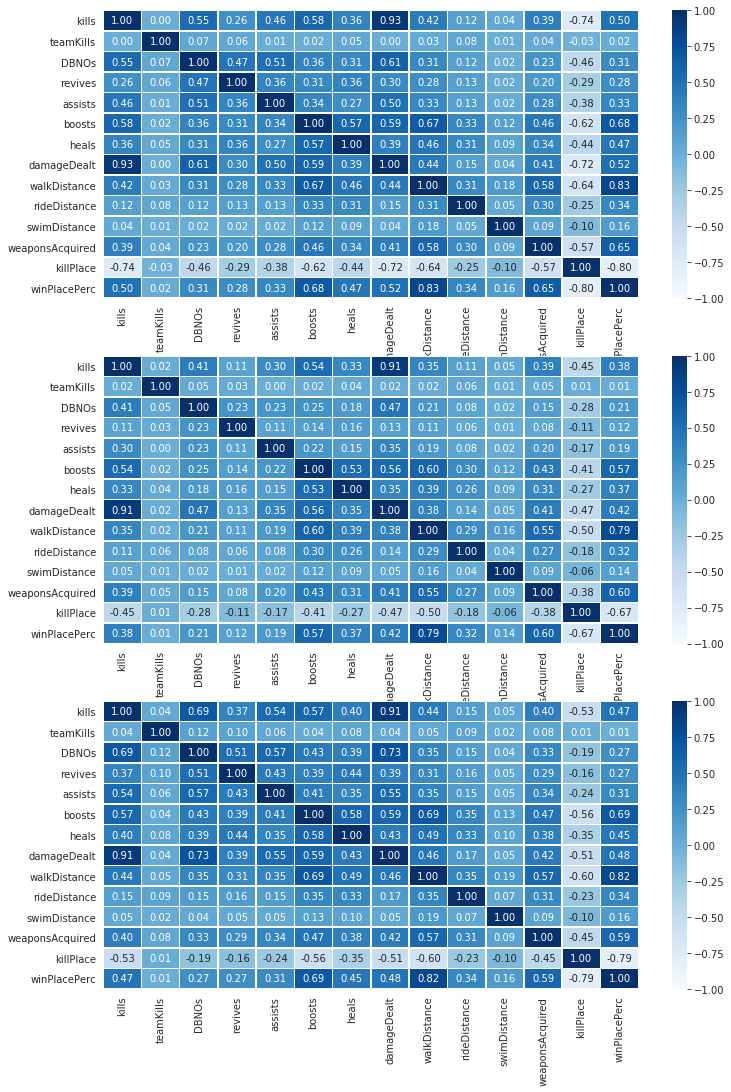

In [105]:
cols = ['kills','teamKills','DBNOs','revives','assists','boosts','heals','damageDealt','walkDistance','rideDistance','swimDistance','weaponsAcquired']
cols.extend(['killPlace','winPlacePerc'])
group = train.groupby(['matchId','groupId'])[cols]

fig, ax = plt.subplots(3,1,figsize = (12,18), sharey = True)
for df, ax in zip ([group.mean(), group.min(), group.max()], ax.ravel()):
  sns.heatmap(df.corr(), annot = True, linewidths =.6, fmt = '.2f', vmax = 1, vmin = -1, center = 0, cmap = 'Blues', ax = ax)

del df 